In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression,LinearRegression
pd.set_option('display.max_columns', None)

In [83]:
df_d = pd.read_csv('../data/7-final-data-day.csv')
df_h = pd.read_csv('../data/7-final-data-hour.csv')
data = [df_h,df_d]
for item in data:
    item.drop(columns='Unnamed: 0',inplace=True)
    item['timestamp'] = pd.to_datetime(item['timestamp'])
df_d.head()

,timestamp,subjectivity,compound,pos_pol,neg_pol,neu_pol,text,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2016-01-01,0.268975,0.301230,0.152325,0.036704,0.811015,662,423.52,423.52,423.51,423.51,1.159208,490.946953,423.519330
1,2016-01-02,0.301871,0.388479,0.173094,0.014299,0.812633,619,431.70,433.44,431.70,433.44,15.703212,6795.238725,432.729225
2,2016-01-03,0.369974,0.428669,0.186620,0.005385,0.808005,443,432.04,432.04,432.04,432.04,0.056872,24.570776,432.040000
3,2016-01-04,0.364042,0.393258,0.179719,0.009154,0.811140,480,427.50,428.08,427.40,428.08,22.577334,9653.994770,427.596751
4,2016-01-05,0.431407,0.399047,0.185405,0.008220,0.806382,448,434.22,434.22,434.22,434.22,0.025125,10.909995,434.220000


In [84]:
df_h.head()

,timestamp,subjectivity,compound,pos_pol,neg_pol,neu_pol,text,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2016-01-01 00:00:00,0.014286,0.448043,0.168571,0.0000,0.831429,12,423.52,423.52,423.51,423.51,1.159208,490.946953,423.519330
1,2016-01-01 01:00:00,0.166667,0.440400,0.173000,0.0000,0.827000,20,431.05,431.59,430.25,430.25,22.282782,9607.642275,431.168894
2,2016-01-01 02:00:00,0.000000,0.404300,0.164125,0.0000,0.835875,18,430.94,430.94,430.27,430.88,2.530808,1089.551791,430.515338
3,2016-01-01 03:00:00,0.101667,0.378900,0.161750,0.0175,0.820750,22,430.91,430.91,430.90,430.90,0.873573,376.430192,430.908531
4,2016-01-01 04:00:00,0.213333,0.359011,0.156667,0.0210,0.822333,26,430.01,430.01,430.01,430.01,0.223270,96.008427,430.010000


In [85]:
df_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14505 entries, 0 to 14504
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   timestamp          14505 non-null  datetime64[ns]
 1   subjectivity       13318 non-null  float64       
 2   compound           13318 non-null  float64       
 3   pos_pol            13318 non-null  float64       
 4   neg_pol            13318 non-null  float64       
 5   neu_pol            13318 non-null  float64       
 6   text               14505 non-null  int64         
 7   Open               14505 non-null  float64       
 8   High               14505 non-null  float64       
 9   Low                14505 non-null  float64       
 10  Close              14505 non-null  float64       
 11  Volume_(BTC)       14505 non-null  float64       
 12  Volume_(Currency)  14505 non-null  float64       
 13  Weighted_Price     14505 non-null  float64       
dtypes: dat

In [86]:
df_h.fillna(0,inplace=True)

In [87]:
df_d.head()

,timestamp,subjectivity,compound,pos_pol,neg_pol,neu_pol,text,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2016-01-01,0.268975,0.301230,0.152325,0.036704,0.811015,662,423.52,423.52,423.51,423.51,1.159208,490.946953,423.519330
1,2016-01-02,0.301871,0.388479,0.173094,0.014299,0.812633,619,431.70,433.44,431.70,433.44,15.703212,6795.238725,432.729225
2,2016-01-03,0.369974,0.428669,0.186620,0.005385,0.808005,443,432.04,432.04,432.04,432.04,0.056872,24.570776,432.040000
3,2016-01-04,0.364042,0.393258,0.179719,0.009154,0.811140,480,427.50,428.08,427.40,428.08,22.577334,9653.994770,427.596751
4,2016-01-05,0.431407,0.399047,0.185405,0.008220,0.806382,448,434.22,434.22,434.22,434.22,0.025125,10.909995,434.220000


In [88]:
df_d['change'] = (df_d['Close'] - df_d['Close'].shift(1)).astype(float)
df_d.head()
#drop empty
#df = df.dropna(subset=['Change'])
#max positive change 
#max_change = df["Change"].max()
#max negative change 
#min_change = df["Change"].min()

,timestamp,subjectivity,compound,pos_pol,neg_pol,neu_pol,text,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,change
0,2016-01-01,0.268975,0.301230,0.152325,0.036704,0.811015,662,423.52,423.52,423.51,423.51,1.159208,490.946953,423.519330,NaN
1,2016-01-02,0.301871,0.388479,0.173094,0.014299,0.812633,619,431.70,433.44,431.70,433.44,15.703212,6795.238725,432.729225,9.93
2,2016-01-03,0.369974,0.428669,0.186620,0.005385,0.808005,443,432.04,432.04,432.04,432.04,0.056872,24.570776,432.040000,-1.40
3,2016-01-04,0.364042,0.393258,0.179719,0.009154,0.811140,480,427.50,428.08,427.40,428.08,22.577334,9653.994770,427.596751,-3.96
4,2016-01-05,0.431407,0.399047,0.185405,0.008220,0.806382,448,434.22,434.22,434.22,434.22,0.025125,10.909995,434.220000,6.14


In [89]:
df_d['direction'] = np.where(df_d['change']>0,1,0)
df_d['short_mavg'] = df_d.rolling(window=9)["Close"].mean()
#df_d['mid_mavg'] = df_d.rolling(window=21)["Close"].mean()
#df_d['long_mavg'] = df_d.rolling(window=200)["Close"].mean()
df_d[0:15]


,timestamp,subjectivity,compound,pos_pol,neg_pol,neu_pol,text,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,change,direction,short_mavg
0,2016-01-01,0.268975,0.301230,0.152325,0.036704,0.811015,662,423.52,423.52,423.51,423.51,1.159208,490.946953,423.519330,NaN,0,NaN
1,2016-01-02,0.301871,0.388479,0.173094,0.014299,0.812633,619,431.70,433.44,431.70,433.44,15.703212,6795.238725,432.729225,9.93,1,NaN
2,2016-01-03,0.369974,0.428669,0.186620,0.005385,0.808005,443,432.04,432.04,432.04,432.04,0.056872,24.570776,432.040000,-1.40,0,NaN
3,2016-01-04,0.364042,0.393258,0.179719,0.009154,0.811140,480,427.50,428.08,427.40,428.08,22.577334,9653.994770,427.596751,-3.96,0,NaN
4,2016-01-05,0.431407,0.399047,0.185405,0.008220,0.806382,448,434.22,434.22,434.22,434.22,0.025125,10.909995,434.220000,6.14,1,NaN
5,2016-01-06,0.322837,0.414736,0.180171,0.004808,0.815030,469,433.19,433.22,433.03,433.22,3.464274,1500.400094,433.106671,-1.00,0,NaN
6,2016-01-07,0.265040,0.418333,0.178684,0.005399,0.815921,636,431.43,431.43,430.80,430.80,0.145000,62.529000,431.234483,-2.42,0,NaN
7,2016-01-08,0.314579,0.322571,0.163751,0.030990,0.805315,640,454.31,454.50,454.09,454.50,4.798634,2180.244580,454.346885,23.70,1,NaN
8,2016-01-09,0.285102,0.368382,0.169491,0.020570,0.809971,571,454.71,454.76,454.71,454.76,1.401400,637.264186,454.733971,0.26,1,436.063333
9,2016-01-10,0.269307,0.380652,0.169471,0.012698,0.817844,516,449.51,449.73,449.51,449.73,3.196410,1437.288159,449.656962,-5.03,0,438.976667


In [90]:
df_d_16 = df_d[(df_d['timestamp'] > "2016-01-01") & (df_d['timestamp'] < "2016-12-31")]
df_d_17 = df_d[(df_d['timestamp'] > "2017-01-01") & (df_d['timestamp'] < "2017-12-31")]

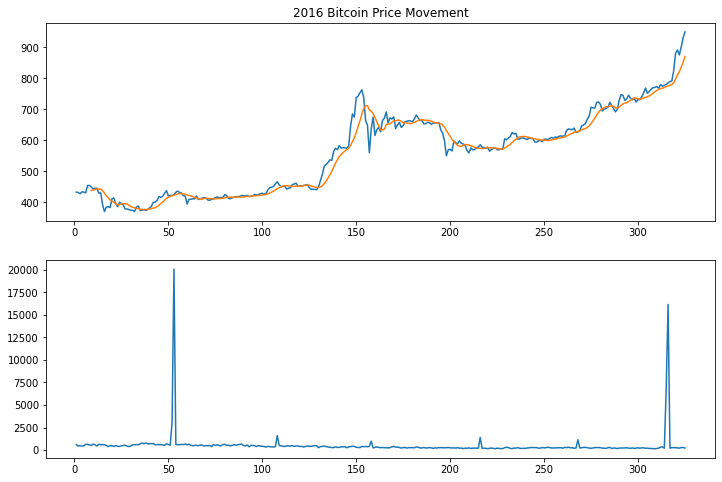

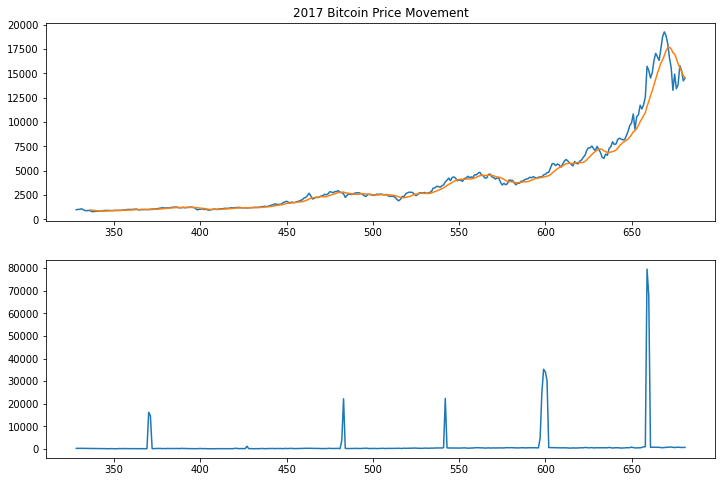

In [181]:
def rolling_plot(df,title):    
    fig,ax = plt.subplots(2,1,figsize=(12,8))
    ax[0].plot(df['Close'])
    ax[0].plot(df['Close'].rolling(9).mean())
    #ax[0].plot(df['Close'].rolling(21).mean())
    ax[1].plot(df['text'])
    ax[0].set_title(title);
rolling_plot(df_d_16,'2016 Bitcoin Price Movement')
rolling_plot(df_d_17,'2017 Bitcoin Price Movement')

#creating lag features
def create_lagged_features(data, to_keep=1, to_remove=1):
    variables = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    columns, names = list(), list()
    
    for i in range(to_keep, 0, -1):
        columns.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(variables)]

    for i in range(0, to_remove):
        columns.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(variables)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(variables)]
            
    #put it all together
    final = pd.concat(columns, axis=1)
    final.columns = names
    
    #drop rows with NaN values
    final.dropna(inplace=True)
        
    return final

create_lagged_features(df_d,to_keep=1,to_remove=1)

In [100]:
df = df_d.set_index('timestamp')
df['target_direction'] = df['direction'].shift(-1)
df = df.dropna(axis=0)
df.tail()

,subjectivity,compound,pos_pol,neg_pol,neu_pol,text,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,change,direction,short_mavg,target_direction
timestamp,,,,,,,,,,,,,,,,,
2017-12-25,0.365203,0.179767,0.139839,0.077315,0.782923,780,13383.01,13462.82,13354.57,13414.49,40.934161,549502.252020,13424.050587,-1499.57,0,16514.538889,1.0
2017-12-26,0.352813,0.162141,0.139027,0.069973,0.791061,831,13805.00,13823.98,13799.00,13819.91,3.545876,48947.932330,13804.184854,405.42,1,15966.751111,1.0
2017-12-27,0.405052,0.169435,0.149479,0.068806,0.781715,747,15770.00,15775.00,15766.00,15775.00,1.315622,20747.115874,15769.812609,1955.09,1,15580.640000,0.0
2017-12-28,0.386259,0.171025,0.146278,0.069313,0.784443,700,15295.98,15296.00,15238.41,15293.45,7.467622,113903.514470,15252.984410,-481.55,0,15182.257778,0.0
2017-12-29,0.363707,0.155337,0.148620,0.072114,0.779362,737,14258.60,14277.00,14223.04,14223.04,4.946539,70469.852719,14246.294114,-1070.41,0,14759.771111,1.0


In [101]:
df.columns

Index(['subjectivity', 'compound', 'pos_pol', 'neg_pol', 'neu_pol', 'text',
       'Open', 'High', 'Low', 'Close', 'Volume_(BTC)', 'Volume_(Currency)',
       'Weighted_Price', 'change', 'direction', 'short_mavg',
       'target_direction'],
      dtype='object')

In [102]:
df.shape

(673, 17)

In [103]:
df.shape[0]/5*4

538.4

In [109]:
#including lag data
df_d_lag = df_d.set_index('timestamp')
df_d_lag.drop(columns=['pos_pol', 'neg_pol',
       'neu_pol','Open', 'High', 'Low','Volume_(Currency)','direction'])
for col in df_d_lag.columns:
    df_d_lag[f'{col} (t-1)'] = df_d_lag[col].shift(1)
    df_d_lag[f'{col} (t-2)'] = df_d_lag[col].shift(2)
df_d_lag['target_direction'] = df_d_lag['direction'].shift(-1)
df_d_lag = df_d_lag.dropna(axis=0)
df_d_lag.head()

,subjectivity,compound,pos_pol,neg_pol,neu_pol,text,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,change,direction,short_mavg,subjectivity (t-1),subjectivity (t-2),compound (t-1),compound (t-2),pos_pol (t-1),pos_pol (t-2),neg_pol (t-1),neg_pol (t-2),neu_pol (t-1),neu_pol (t-2),text (t-1),text (t-2),Open (t-1),Open (t-2),High (t-1),High (t-2),Low (t-1),Low (t-2),Close (t-1),Close (t-2),Volume_(BTC) (t-1),Volume_(BTC) (t-2),Volume_(Currency) (t-1),Volume_(Currency) (t-2),Weighted_Price (t-1),Weighted_Price (t-2),change (t-1),change (t-2),direction (t-1),direction (t-2),short_mavg (t-1),short_mavg (t-2),target_direction
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-11,0.317164,0.269069,0.149517,0.042975,0.807562,663,443.84,443.88,443.84,443.88,1.720607,763.713400,443.862797,-5.85,0,440.136667,0.269307,0.285102,0.380652,0.368382,0.169471,0.169491,0.012698,0.020570,0.817844,0.809971,516.0,571.0,449.51,454.71,449.73,454.76,449.51,454.71,449.73,454.76,3.196410,1.401400,1437.288159,637.264186,449.656962,454.733971,-5.03,0.26,0.0,1.0,438.976667,436.063333,1.0
2016-01-12,0.374819,0.265744,0.156485,0.046433,0.797148,586,445.80,445.80,445.80,445.80,3.051522,1360.368557,445.800000,1.92,1,441.665556,0.317164,0.269307,0.269069,0.380652,0.149517,0.169471,0.042975,0.012698,0.807562,0.817844,663.0,516.0,443.84,449.51,443.88,449.73,443.84,449.51,443.88,449.73,1.720607,3.196410,763.713400,1437.288159,443.862797,449.656962,-5.85,-5.03,0.0,0.0,440.136667,438.976667,1.0
2016-01-13,0.348373,0.401209,0.178198,0.009812,0.812005,449,446.14,446.37,446.06,446.06,1.833123,817.804665,446.126401,0.26,1,443.663333,0.374819,0.317164,0.265744,0.269069,0.156485,0.149517,0.046433,0.042975,0.797148,0.807562,586.0,663.0,445.80,443.84,445.80,443.88,445.80,443.84,445.80,443.88,3.051522,1.720607,1360.368557,763.713400,445.800000,443.862797,1.92,-5.85,1.0,0.0,441.665556,440.136667,0.0
2016-01-14,0.328722,0.263915,0.151168,0.046565,0.802337,649,429.82,429.82,429.82,429.82,1.395518,599.821637,429.820000,-16.24,0,443.174444,0.348373,0.374819,0.401209,0.265744,0.178198,0.156485,0.009812,0.046433,0.812005,0.797148,449.0,586.0,446.14,445.80,446.37,445.80,446.06,445.80,446.06,445.80,1.833123,3.051522,817.804665,1360.368557,446.126401,445.800000,0.26,1.92,1.0,1.0,443.663333,441.665556,1.0
2016-01-15,0.294612,0.344127,0.164895,0.023571,0.811553,594,430.95,430.95,430.95,430.95,0.500000,215.475000,430.950000,1.13,1,442.922222,0.328722,0.348373,0.263915,0.401209,0.151168,0.178198,0.046565,0.009812,0.802337,0.812005,649.0,449.0,429.82,446.14,429.82,446.37,429.82,446.06,429.82,446.06,1.395518,1.833123,599.821637,817.804665,429.820000,446.126401,-16.24,0.26,0.0,1.0,443.174444,443.663333,0.0


In [166]:
df_d_lag.to_csv('../data/8-lag-feature-day.csv')

In [148]:
#lstm data creation

df['target_direction'] = df['direction'].shift(-1)
features = ['target_direction','subjectivity', 'compound', 'text','Close', 'Volume_(BTC)',
       'Weighted_Price','short_mavg'] #'pos_pol', 'neg_pol', 'neu_pol','Open', 'High', 'Low',

train = df[features].iloc[:538]
test = df[features].iloc[538:]
train_X = train.drop(columns='target_direction')
train_Y = train['target_direction']
test_X = test.drop(columns='target_direction')
test_Y = test['target_direction']
mm = MinMaxScaler()
c_train_sc = mm.fit_transform(train_X)
c_test_sc = mm.transform(test_X)

In [151]:
pd.DataFrame(c_train_sc)

,0,1,2,3,4,5,6
0,0.435078,0.843774,0.020533,0.021835,0.006943,0.021820,0.017859
1,0.398144,0.863883,0.018062,0.020533,0.015848,0.020507,0.018741
2,0.510052,0.681015,0.024666,0.019019,0.008526,0.019008,0.019092
3,0.644871,0.675566,0.021207,0.019516,0.015130,0.019509,0.019555
4,0.583030,0.897571,0.015051,0.019583,0.009085,0.019593,0.020160
...,...,...,...,...,...,...,...
533,0.355074,0.417383,0.021926,0.819421,0.000224,0.820066,0.865293
534,0.604776,0.607883,1.000000,0.900643,0.079917,0.900136,0.901915
535,0.439430,0.562889,0.020443,0.944658,0.050143,0.946953,0.940670
536,0.580188,0.633812,0.016220,1.000000,0.082587,1.000000,0.975286


In [152]:
pd.DataFrame(train_Y)

,target_direction
timestamp,
2016-01-09,0.0
2016-01-10,0.0
2016-01-11,1.0
2016-01-12,1.0
2016-01-13,0.0
...,...
2017-08-12,1.0
2017-08-13,1.0
2017-08-14,1.0


In [129]:
train['target_direction'].value_counts(normalize=True)

1.0    0.605948
0.0    0.394052
Name: target_direction, dtype: float64

In [154]:
n_past = 4
n_future = 1
trainX = []
trainY = train_Y.iloc[4:]
testX = []
testY = test_Y.iloc[4:]

#transforming dta to a 3 dimensional moving data as per required by our model
for i in range(n_past, len(c_train_sc)- n_future + 1):
    trainX.append(c_train_sc[i - n_past:i,1:c_train_sc.shape[1]])
    #trainY.append(c_train_sc[(i + n_future-1): (i + n_future),0])

trainX,trainY = np.array(trainX),np.array(trainY) #taking past 4 week data to predict the next (5th one) and so one
for i in range(n_past, len(c_test_sc)- n_future + 1):
    testX.append(c_test_sc[i - n_past:i,1:c_test_sc.shape[1]])
    #testY.append(c_test_sc[(i + n_future-1): (i + n_future),0])
testX,testY = np.array(testX),np.array(testY)
print(f'train X shape = {trainX.shape}')
print(f'train Y shape = {trainY.shape}') #4rows missing 
print(f'test X shape = {testX.shape}')
print(f'test Y shape = {testY.shape}') #4rows missing 

train X shape = (534, 4, 6)
train Y shape = (534,)
test X shape = (131, 4, 6)
test Y shape = (131,)


In [155]:
pd.DataFrame(c_train_sc[:10])

,0,1,2,3,4,5,6
0,0.435078,0.843774,0.020533,0.021835,0.006943,0.021820,0.017859
1,0.398144,0.863883,0.018062,0.020533,0.015848,0.020507,0.018741
2,0.510052,0.681015,0.024666,0.019019,0.008526,0.019008,0.019092
3,0.644871,0.675566,0.021207,0.019516,0.015130,0.019509,0.019555
4,0.583030,0.897571,0.015051,0.019583,0.009085,0.019593,0.020160
5,0.537079,0.672568,0.024037,0.015380,0.006913,0.015374,0.020012
6,0.457315,0.804024,0.021566,0.015672,0.002470,0.015667,0.019935
7,0.321307,0.583421,0.021746,0.005883,0.153171,0.005883,0.018668
8,0.392893,0.804619,0.021971,0.000052,0.023706,0.000052,0.015845
9,0.572310,0.832018,0.017882,0.003818,0.333804,0.004106,0.013503


In [156]:
pd.DataFrame(trainX[1])

,0,1,2,3,4,5
0,0.863883,0.018062,0.020533,0.015848,0.020507,0.018741
1,0.681015,0.024666,0.019019,0.008526,0.019008,0.019092
2,0.675566,0.021207,0.019516,0.015130,0.019509,0.019555
3,0.897571,0.015051,0.019583,0.009085,0.019593,0.020160


In [158]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.optimizers import Adam
model = Sequential()
model.add(LSTM(64,activation='relu',input_shape=(trainX.shape[1],trainX.shape[2]),return_sequences=True)) #would like to have next LSTM to feed this output
model.add(LSTM(32,activation='relu',return_sequences=False))
model.add(Dropout(0.2)) 
model.add(Dense(1))

opt = Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 4, 64)             18176     
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 30,625
Trainable params: 30,625
Non-trainable params: 0
_________________________________________________________________


Epoch 1/30
54/54 [==============================] - 4s 15ms/step - loss: 3.4132 - accuracy: 0.3933 - val_loss: nan - val_accuracy: 0.4504
Epoch 2/30
54/54 [==============================] - 0s 6ms/step - loss: 2.2078 - accuracy: 0.3933 - val_loss: nan - val_accuracy: 0.4504
Epoch 3/30
54/54 [==============================] - 0s 6ms/step - loss: 1.8819 - accuracy: 0.3933 - val_loss: nan - val_accuracy: 0.4504
Epoch 4/30
54/54 [==============================] - 0s 6ms/step - loss: 1.6532 - accuracy: 0.3933 - val_loss: nan - val_accuracy: 0.4427
Epoch 5/30
54/54 [==============================] - 0s 6ms/step - loss: 1.4923 - accuracy: 0.3933 - val_loss: nan - val_accuracy: 0.4351
Epoch 6/30
54/54 [==============================] - 0s 6ms/step - loss: 1.3005 - accuracy: 0.3933 - val_loss: nan - val_accuracy: 0.5191
Epoch 7/30
54/54 [==============================] - 0s 6ms/step - loss: 1.1517 - accuracy: 0.3933 - val_loss: nan - val_accuracy: 0.5344
Epoch 8/30
54/54 [======================

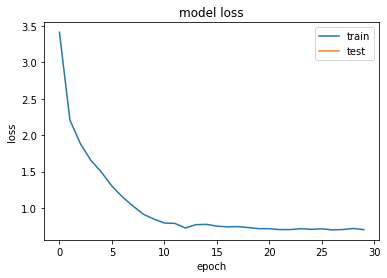

In [159]:
history = model.fit(trainX,trainY, validation_data=(testX, testY),epochs=30,batch_size=10, verbose=1)

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [165]:
testY.shape

(131,)

In [172]:
# make a prediction
df = pd.DataFrame(testY)
y_pred = model.predict(testX)
#prediction_copies = np.repeat(y_pred, 7, axis=-1)
#inv_yhat = mm.inverse_transform(prediction_copies) #inversing it back to actual number
#inv_yhat = pd.DataFrame(inv_yhat.iloc[0])
#inv_yhat.iloc[0].head()
df['prediction'] = np.where(y_pred>0.5,1,0)
df.head()

5/5 [==============================] - 0s 2ms/step


,0,prediction
0,0.0,1
1,0.0,1
2,1.0,1
3,1.0,1
4,1.0,1


In [174]:
y_pred<0.5

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [